# Walmart Sales Prediction 

## 1. Problem Definition 
Provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, can we project the sales for each department in each store? To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.


## 2. Data 

The data is collected from kaggle's Walmart sales dataset . The link to the same is provided below :
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data


## 3. Evaluation 

This project is evaluated on weighted mean absolute error (WMAE) . 


## 4. Features 

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index
* Unemployment - the unemployment rate


## 5. Importing the Data 





In [1]:
# Import main libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns 
%matplotlib inline 

In [2]:
# reading all the data and combine it into one single dataset
data = pd.read_csv("walmart-recruiting-store-sales-forecasting/train.csv")
features = pd.read_csv("walmart-recruiting-store-sales-forecasting/features.csv").drop("IsHoliday",axis=1)
stores = pd.read_csv("walmart-recruiting-store-sales-forecasting/stores.csv")

data=data.merge(stores,how='left').merge(features,how='left')
data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [4]:
data["Type"].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [5]:
data.isnull().any().sum()

5

## 6. Exploratory Data Analysis (EDA)

In [6]:
# making a function called scatter for visualization 
def scatter(data, column):
    plt.figure()
    plt.scatter(data[column],data["Weekly_Sales"])
    plt.ylabel("Weekly sales")
    plt.xlabel(column)

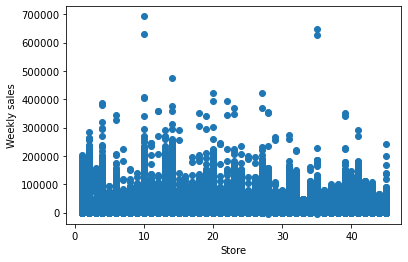

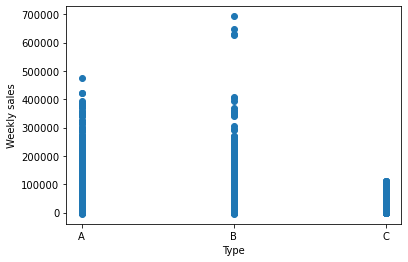

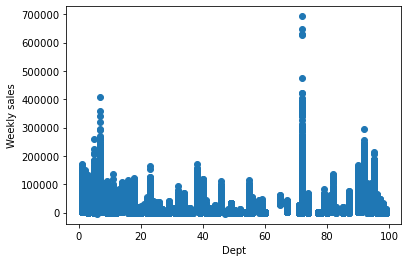

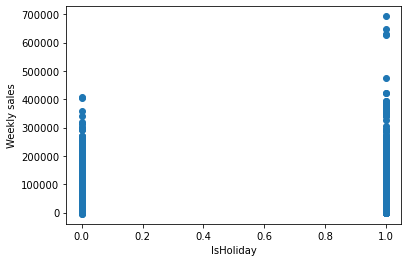

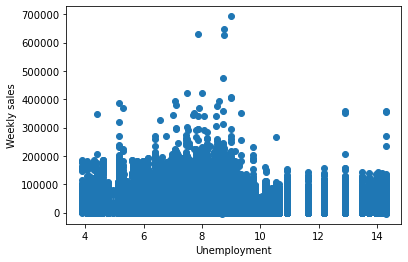

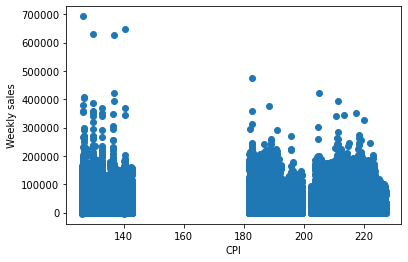

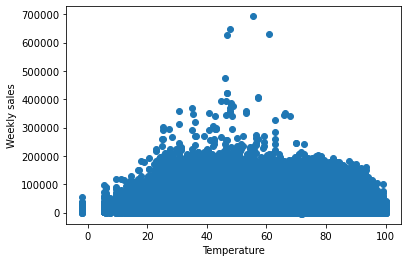

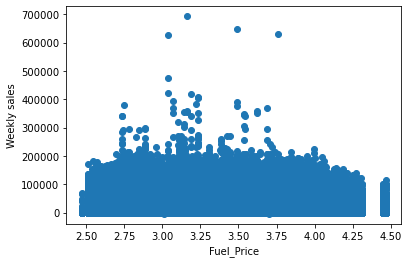

In [7]:
scatter(data, "Store")
scatter(data,"Type")
scatter(data,"Dept")
scatter(data, "IsHoliday")
scatter(data,"Unemployment")
scatter(data, "CPI")
scatter(data,"Temperature")
scatter(data, "Fuel_Price")

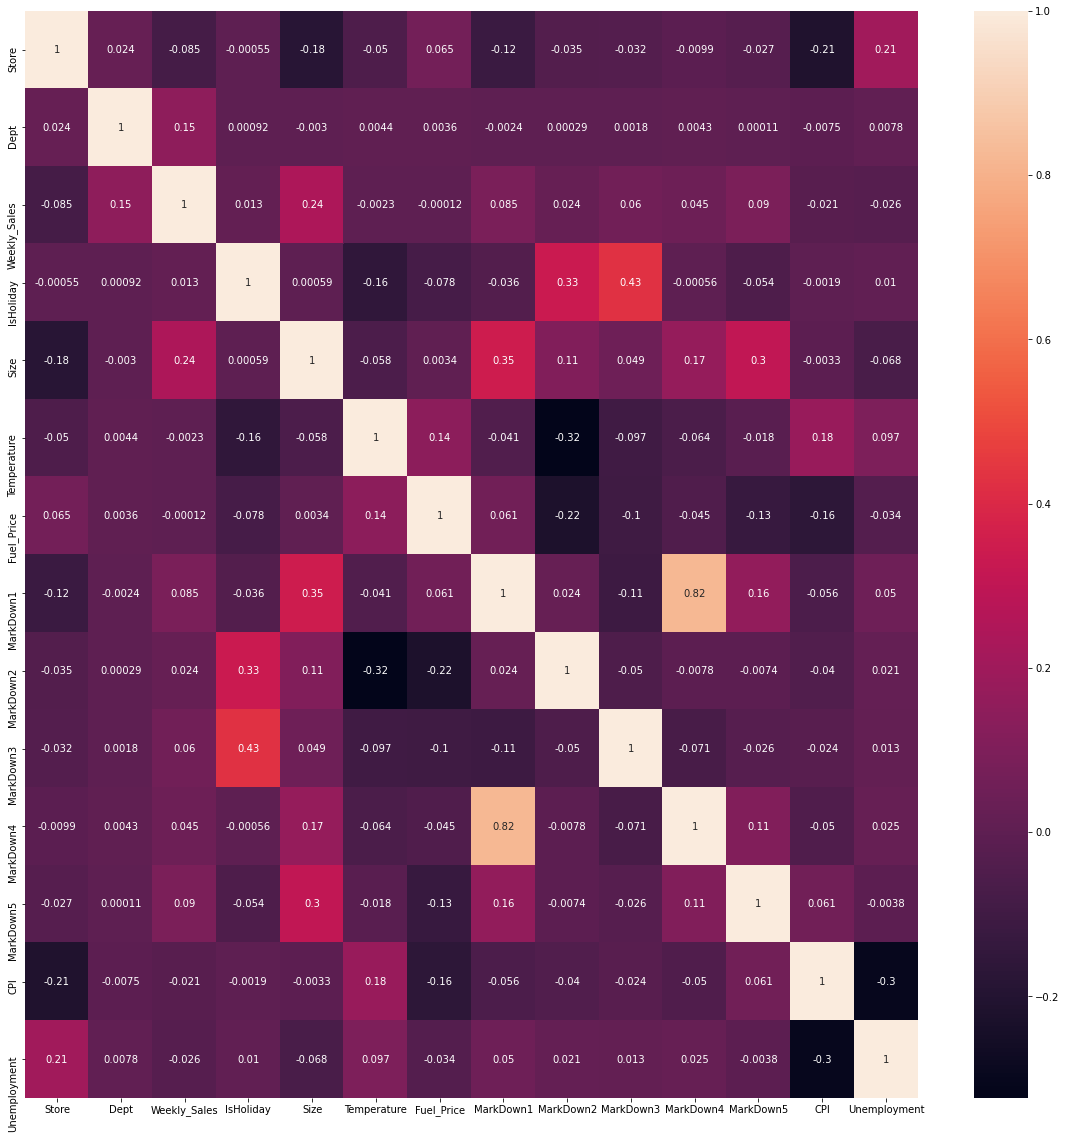

In [8]:
# making the correlation matrix 
corr_matrix=data.corr()
corr_matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,)

## 7. Data Manipulation 

In [9]:
# converting type from categorical to int 

data=pd.get_dummies(data,columns=["Type"],drop_first=True)


In [10]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0
1,1,1,2010-02-12,46039.49,True,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,0,0
2,1,1,2010-02-19,41595.55,False,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,0
3,1,1,2010-02-26,19403.54,False,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,0
4,1,1,2010-03-05,21827.90,False,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,0


In [11]:
# Filling any missing values with 0

data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [12]:
data.isnull().any().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Size          421570 non-null  int64  
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type_B        421570 non-null  uint8  
 16  Type_C        421570 non-null  uint8  
dtypes: bool(1), float64(10), int64(3), object(1), ui

In [14]:
# Here we're only selecting the month from date column and removing the rest 
data['Month'] = pd.to_datetime(data['Date']).dt.month

In [15]:
# removing the "Date" column from the dataset 
data=data.drop("Date",axis=1)

In [16]:
data=pd.get_dummies(data,columns=["IsHoliday"],drop_first=True)

In [17]:
data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C,Month,IsHoliday_True
0,1,1,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,2,0
1,1,1,46039.49,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,0,2,1
2,1,1,41595.55,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,2,0
3,1,1,19403.54,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,0,2,0
4,1,1,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,0,3,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Store           421570 non-null  int64  
 1   Dept            421570 non-null  int64  
 2   Weekly_Sales    421570 non-null  float64
 3   Size            421570 non-null  int64  
 4   Temperature     421570 non-null  float64
 5   Fuel_Price      421570 non-null  float64
 6   MarkDown1       421570 non-null  float64
 7   MarkDown2       421570 non-null  float64
 8   MarkDown3       421570 non-null  float64
 9   MarkDown4       421570 non-null  float64
 10  MarkDown5       421570 non-null  float64
 11  CPI             421570 non-null  float64
 12  Unemployment    421570 non-null  float64
 13  Type_B          421570 non-null  uint8  
 14  Type_C          421570 non-null  uint8  
 15  Month           421570 non-null  int64  
 16  IsHoliday_True  421570 non-null  uint8  
dtypes: float64

## 8. Data Modelling 

In [19]:
#Splitting of data into x and y :
x=data.drop("Weekly_Sales",axis=1)
y=data["Weekly_Sales"]

In [40]:
len(y)

421570

In [20]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [21]:
#splitting the data into training and validation data 
np.random.seed(42)
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2)

In [22]:
model1=LinearRegression()
model1.fit(x_train,y_train)
model1.score(x_valid,y_valid)


0.09245151517528849

In [23]:
model2=Ridge()
model2.fit(x_train,y_train)
model2.score(x_valid,y_valid)

0.0924515283906382

In [24]:
model3=RandomForestRegressor()
model3.fit(x_train,y_train)
model3.score(x_valid,y_valid)

0.9653560665285751

## 9. Hyperparameter Tuning with RandomizedSearchCV and selecting the best model as RandomForestRegressor

In [25]:

from sklearn.model_selection import RandomizedSearchCV
# different RandomForestRegressor Hyperparameters 
rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"]}

#Instantiate RandomizedSearchCV model 
best_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                            param_distributions=rf_grid,
                            n_iter=10,
# i only did 10 for this case, if you have more time or computing power in your laptop, set it to a higher value ex(100).
                            cv=5,
                            verbose=True)
#fit the RandomizedSearchCV model
best_model.fit(x,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.9min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [26]:
best_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_features': 0.5,
 'max_depth': None}

In [48]:
# importing test data set 
data_test=pd.read_csv("walmart-recruiting-store-sales-forecasting/test.csv")
features = pd.read_csv("walmart-recruiting-store-sales-forecasting/features.csv").drop("IsHoliday",axis=1)
stores = pd.read_csv("walmart-recruiting-store-sales-forecasting/stores.csv")

data_test=data_test.merge(stores,how='left').merge(features,how='left')
data_test.head()



,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [50]:
# performing data manipulation on test data 

data_test=pd.get_dummies(data_test,columns=["Type"],drop_first=True)
data_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = data_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
data_test['Month'] = pd.to_datetime(data_test['Date']).dt.month
data_test=data_test.drop("Date",axis=1)
data_test=pd.get_dummies(data_test,columns=["IsHoliday"],drop_first=True)


In [51]:
data_test.head()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C,Month,IsHoliday_True
0,1,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,0,11,0
1,1,1,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,0,11,0
2,1,1,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,0,11,0
3,1,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,0,0,11,1
4,1,1,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,0,11,0


In [52]:
data_test.isnull().any().sum()

2

In [53]:
data_test=data_test.fillna(0)

In [54]:
sales_prediction=best_model.predict(data_test)

In [55]:
sales_prediction

array([24538.80726849, 22827.43785356, 23676.03972583, ...,
         975.76612508,   502.16504186,   514.71083049])

In [57]:
sales_output=pd.DataFrame(sales_prediction, columns=["sales"])

In [58]:
sales_output.head()

,sales
0,24538.807268
1,22827.437854
2,23676.039726
3,24306.579733
4,31400.500833
